<a href="https://colab.research.google.com/github/konkolyseismolab/seismolab/blob/master/docs/source/inpainting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

[Open this tutorial in Google Colab](https://colab.research.google.com/github/konkolyseismolab/seismolab/blob/master/docs/source/inpainting.ipynb)

# Inpainting

This method deals with gaps in time series data. The inpainting method judiciously fills in gaps in the data, preserving the asteroseismic signal as far as possible.

The mathematical details are described in [Pires+, 2009, MNRAS, 395, 1265](https://ui.adsabs.harvard.edu/abs/2009MNRAS.395.1265P/abstract) and [Pires+, 2015, A&A, 574, 18](https://ui.adsabs.harvard.edu/abs/2015A%26A...574A..18P/abstract).

## __How to use__

In [1]:
from seismolab.inpainting import kinpainting, insert_gaps

from scipy.interpolate import interp1d

import numpy as np
import matplotlib.pyplot as plt

We generate an artifical periodic light curve with random gaps.

In [2]:
np.random.seed(12345)

time = np.linspace(0,7,300)

time = time[ np.random.choice( np.arange(time.shape[0]), size=int(time.shape[0]*.7), replace=False) ]
time = np.sort(time) + 1400.1

mag = 0.1 * np.sin(2*np.pi*time/0.14)

mag += np.random.normal(0,0.005,time.shape[0])

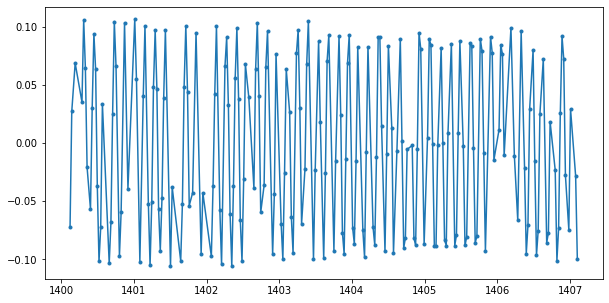

In [3]:
plt.figure(figsize=(10,5))
plt.plot(time,mag,'.',ls='-')
plt.show()

### K-inpainting

The inpainting methods is called K-inpainting, because it was originally developed for the interpolation of Kepler observations. As the method is developed for light curves sampled in a regular grid, k-inpainting resamples the input times series before interpolation.

`kinpainting` is called by passing the light curve.

In [4]:
inpainted, inpainted_irreg = kinpainting(time,mag)

ALLO ALLO Signal size: Nx = 299
ALLOC: Selection:Multiscale Local Discrete Cosinus Transform
   Band 1, BlockSize = 64, Nx = 640 
   Band 2, BlockSize = 128, Nx = 640 
   Band 3, BlockSize = 256, Nx = 768 


The result are two 2D arrays:

- `inpainted` stores the filled light curve sampled in a regular grid,
- `inpainted_irreg` stores the filled light curve sampled in an irregular grid; the sampling is similar to the input times series'.

For clarity, we separate the resulted time and brightness points.

In [5]:
time_inpainted = inpainted_irreg[:,0]
mag_inpainted  = inpainted_irreg[:,1]

As it was shown by the authors, the interpolation is unreliable for larger gaps. Thus to not to introduce false information, the gaps present in the original times series and longer than 0.1 days are inserted into the interpolated light curve. The gap size can be set by the user.

In [6]:
time_inpainted,mag_inpainted = insert_gaps(time, time_inpainted, mag_inpainted, max_gap_size=0.1)

### Cubic spline interpolation

To compare the inpanting method with a commonly used technique, we apply scipy's cubic interpolation to the same time series.

In [7]:
mag_interp = interp1d(time,mag,kind='cubic')

And resample the light curve in a regular grid.

In [8]:
# Median sampling of the original times series
dt = np.median(np.diff(time))

time_interp = np.arange(time.min(),time.max(),dt)
mag_interp  = mag_interp(time_interp)

Because the interpolation is unreliable for larger gaps, the gaps present in the original times series and longer than 0.1 days are inserted into the interpolated light curve.

In [9]:
time_interp,mag_interp = insert_gaps(time, time_interp, mag_interp, max_gap_size=0.1)

### Comparing the interpolation methods

To visually compare the performance of the cubic spline and the k-inpainting interpolations, we can plot the original and the interpolated time series. It can be clearly seen that the spline method fills the gaps by interpolating from the nearest points, while the k-inpainting tries to fill the gaps by following the large scale pattern of the data set. The latter obviously preserves the original signal better.

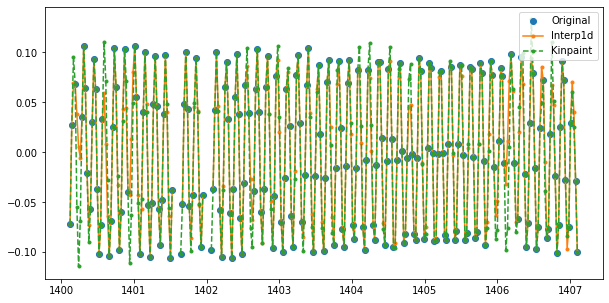

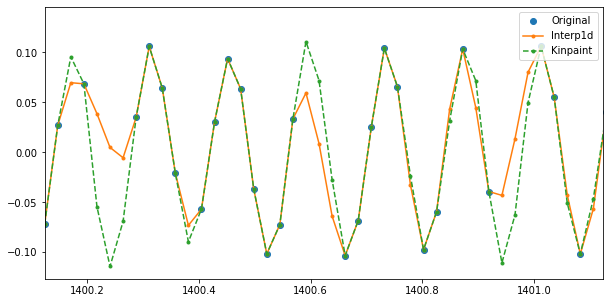

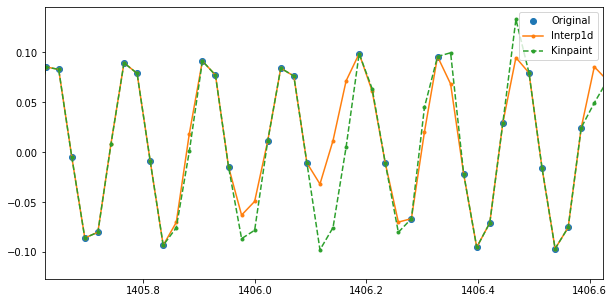

In [10]:
gapat2 = np.where(np.diff(time_interp) > 0.1)[0] + 1
gapat3 = np.where(np.diff(time_inpainted) > 0.1)[0] + 1

plt.figure(figsize=(10,5))
plt.plot(time,mag,'o',label='Original')
plt.plot(np.insert(time_interp,gapat2,np.nan),np.insert(mag_interp,gapat2,np.nan),'.',ls='-',label='Interp1d')
plt.plot(np.insert(time_inpainted,gapat3,np.nan),np.insert(mag_inpainted,gapat3,np.nan),'.',ls='--',label='Kinpaint')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(time,mag,'o',label='Original')
plt.plot(np.insert(time_interp,gapat2,np.nan),np.insert(mag_interp,gapat2,np.nan),'.',ls='-',label='Interp1d')
plt.plot(np.insert(time_inpainted,gapat3,np.nan),np.insert(mag_inpainted,gapat3,np.nan),'.',ls='--',label='Kinpaint')
plt.xlim(time.min(),time.min()+1)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(time,mag,'o',label='Original')
plt.plot(np.insert(time_interp,gapat2,np.nan),np.insert(mag_interp,gapat2,np.nan),'.',ls='-',label='Interp1d')
plt.plot(np.insert(time_inpainted,gapat3,np.nan),np.insert(mag_inpainted,gapat3,np.nan),'.',ls='--',label='Kinpaint')
plt.xlim(time.min()+5.5,time.min()+6.5)
plt.legend(loc='upper right')
plt.show()